# UNSUPERVISED LEARNING

*k-means* is an unsupervised learning algorithm, used to identify clusters in a dataset. Given *k*, the number of clusters to be identified, the algorithm labels the dataset into classes.

**Algorithm**:
* Initialize *k* cluster centroids
* Repeat
    1. Cluster assignment: Assign each observation to the cluster whose mean has the least squared Euclidean distance, this is intuitively the "nearest" mean.
    2. Cluster updation: Calculate the new means to be the centroids of the observations in the new clusters.
    
The algorithm converges when cluster assignments no longer change. Since the results highly depend on the initialization step, we can run the algorithm multiple times with different initialization values and take the average of the results.

Mathematically, given a set of observations $(x^{(1)}, x^{(2)}, ..., x^{(m)})$, where $x^{(i)} \in \mathcal{R}^n$, our target is to partition the *m* observations into *K* clusters so as to minimize the within-cluster sum of squares (variance).


We randomly initialize *K* cluster centroids $\mu_1, \mu_2, ..., \mu_K \in \mathcal{R}^n$.

Cluster assignment step: $c^{(i)} = \operatorname*{argmin}_k ||x^{(i)} - \mu_k ||^2$

Cluster updation step: $\mu_k = \frac{1}{s}[x^{k_1} + ... + x^{k_s}]$ where $s$ is the number of observations in cluster $k$ and $x^{k_y}$ is the $y^{th}$ observation assigned to centroid $\mu_k$.

Let's head over to start implementing it in python. We will use the famous dataset [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) for this exercise.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We shall describe the data and see how it looks like. We will use the features *Sepal width* and *Sepal height* to distinguish between the species. 

In [2]:
# load data
df = pd.read_csv("~/Documents/VIThink/workshop/Data/Iris.csv", index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


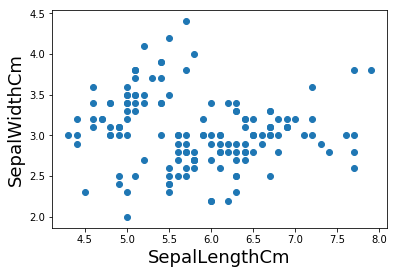

In [3]:
# visualize
X = np.array(df[['SepalLengthCm', 'SepalWidthCm']])
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("SepalLengthCm", fontsize=18)
plt.ylabel("SepalWidthCm", fontsize=18)
plt.show()

## k-means

Complete the following helper functions!

In [4]:
def initialize_centroids(k):
    """ initialize centroid with random points """
    return None

def get_closest_centroid(points, centroids):
    """ compute the Euclidean distance and return the index of the closest centroids """
    return None

Usually when we have some data, the number of categories is unknown. In that case, we need to run for different values of k and fix one accordingly. We will cover that aspect later. For now, we know that the number of species in the dataset. Fixing k as the number of species, let's run the algorithm.

In [ ]:
species = np.array(df.Species.unique())

k = len(species)
maxiters = 100

# choose random centroids
centroids = initialize_centroids(k)

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.xlabel("SepalLengthCm", fontsize=18)
plt.ylabel("SepalWidthCm", fontsize=18)
plt.show()

Now that we have some random starting point for centroids, we will see how k-means performs!

In [ ]:
for _ in range(maxiters):
    # cluster assignment
    idx = get_closest_centroid(X, centroids)
    for c in range(k):
        # cluster updation
        centroids[c] = np.mean(X[idx == c], 0)

In [ ]:
colors = ['coral', 'lightgreen', 'skyblue']

centroid_colors = ['r','g','b']
for i in range(k):
    plt.scatter(X[idx == i][:, 0], X[idx == i][:, 1], color=colors[i], label=species[i])
plt.scatter(centroids[:, 0], centroids[:, 1], c=centroid_colors)
plt.xlabel("SepalLengthCm", fontsize=18)
plt.ylabel("SepalWidthCm", fontsize=18)
plt.legend(loc="upper left")
plt.show()

## Conclusion

We saw how k-means can be used for partioning data. We shall see a very interesting example in the next exercise.